<a href="https://colab.research.google.com/github/sujata-gaihre/Zero-Shot-CLIP-Models/blob/master/california_housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score




In [ ]:
fetch_california_housing1=fetch_california_housing()
fetch_california_housing1.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(fetch_california_housing1.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
print(fetch_california_housing1.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [ ]:
# 1. Load the Dataset
# We use the California Housing dataset built into scikit-learn
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['PRICE'] = data.target  # Target variable (Median House Value in $100,000s)

In [ ]:
df.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [ ]:
# Quick look at the data
print("First 5 rows of data:")
print(df.head())


First 5 rows of data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
print("\nData Description:")
print(df.describe())


Data Description:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.

In [ ]:
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
PRICE,0


In [ ]:


# 2. Prepare Data for Training
X = df.drop('PRICE', axis=1)  # Features (Input)
y = df['PRICE']               # Target (Output)

In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: PRICE, Length: 20640, dtype: float64

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape


(20640, 9)

In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
PRICE,0


In [ ]:
df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
PRICE,float64


In [ ]:
correlation = df.corr()


In [ ]:
correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
PRICE,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

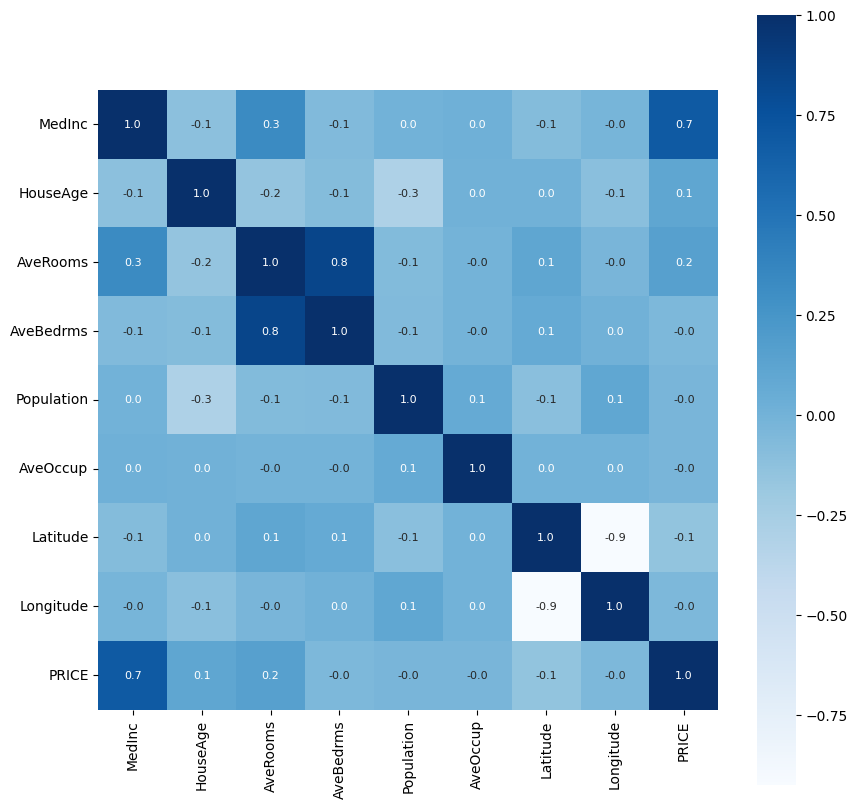

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

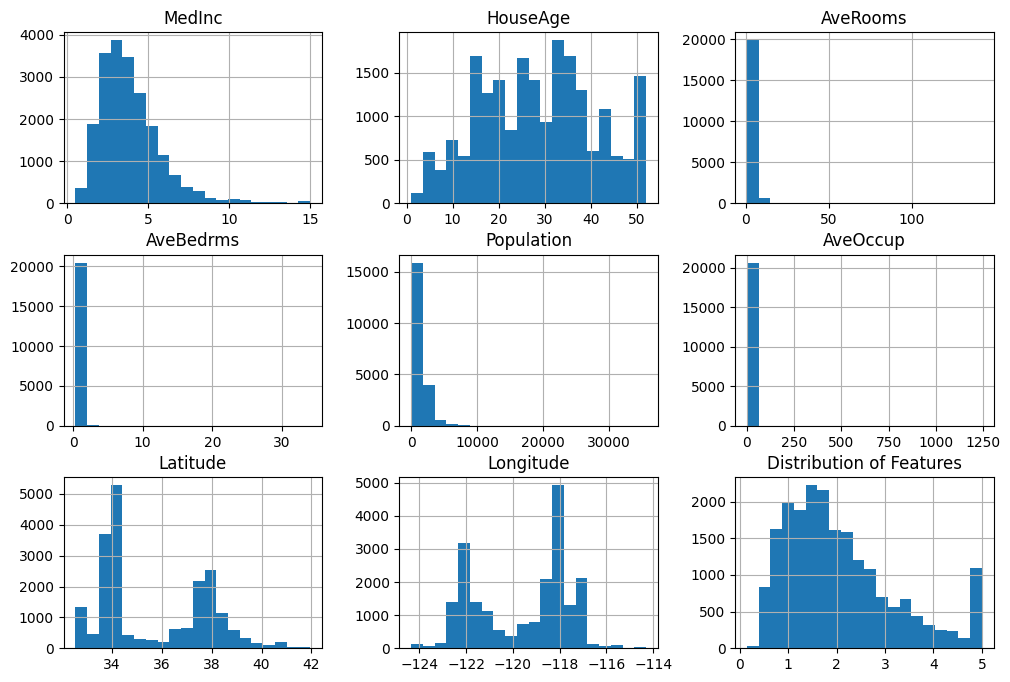

In [ ]:
df.hist(bins=20,figsize=(12,8))
plt.title("Distribution of Features")
plt.show()

In [ ]:
# Split into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)


(20640, 8) (16512, 8) (4128, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Trying Baseline Models:¶**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print("Train R²:", lr.score(X_train_scaled, y_train))
print("Test R²:", lr.score(X_test_scaled, y_test))


Train R²: 0.6125511913966952
Test R²: 0.575787706032451


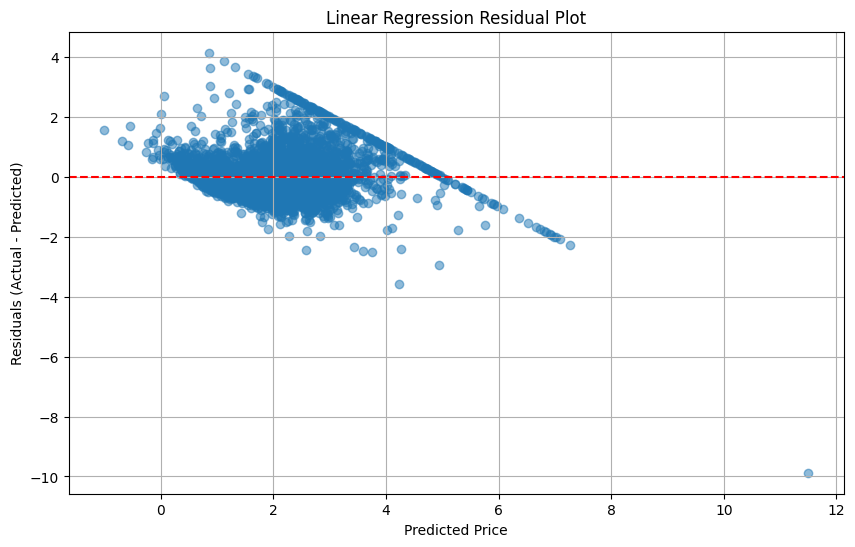

In [ ]:
import matplotlib.pyplot as plt

y_pred_lr = lr.predict(X_test_scaled)
residuals_lr = y_test - y_pred_lr

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, residuals_lr, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Linear Regression Residual Plot")
plt.grid(True)
plt.show()

This residual plot helps to visually inspect the following assumptions for Linear Regression:

*   **Homoscedasticity**: The spread of residuals should be roughly constant across the range of predicted values. If you see a funnel shape, it indicates heteroscedasticity.
*   **Linearity**: Residuals should be randomly scattered around zero. If there's a clear pattern (e.g., a curve), it suggests that the relationship is non-linear and a linear model might not be appropriate.
*   **Normality of Residuals**: While not directly shown on this plot, ideally, the residuals should be normally distributed. This can be further checked with a Q-Q plot or histogram of residuals.

Based on this plot, we can then decide on further experiments, such as:

1.  **Feature Engineering**: If linearity is an issue, consider adding polynomial features or interaction terms.
2.  **Outlier Detection/Removal**: Outliers can significantly skew linear models. Residual plots can help identify data points with large residuals.
3.  **Transformation**: Applying transformations (e.g., log transform) to target or feature variables if assumptions like homoscedasticity or normality are violated.

In [ ]:
print(lr.coef_)

[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


Let's start by detecting and optionally removing outliers, particularly in the columns identified from `df.describe()` that have suspiciously high maximum values.


--- Outlier Detection Report (using IQR) ---

Column: AveRooms
Number of outliers: 511
Lower Bound: 2.02, Upper Bound: 8.47
Outlier examples (first 5):
      AveRooms    PRICE
73   1.714286  0.67500
155  8.972868  4.10300
511  8.928358  5.00001
512  9.210227  5.00001
514  9.122715  5.00001

Column: AveBedrms
Number of outliers: 1424
Lower Bound: 0.87, Upper Bound: 1.24
Outlier examples (first 5):
     AveBedrms  PRICE
41   1.248996  1.500
57   1.372951  0.853
59   0.754386  0.600
61   1.260870  0.750
62   1.557377  0.861

Column: Population
Number of outliers: 1196
Lower Bound: -620.00, Upper Bound: 3132.00
Outlier examples (first 5):
      Population  PRICE
95       3469.0  1.300
185      4367.0  1.128
283      4985.0  3.710
460      3337.0  1.750
485      3276.0  2.536

Column: AveOccup
Number of outliers: 711
Lower Bound: 1.15, Upper Bound: 4.56
Outlier examples (first 5):
       AveOccup    PRICE
89    4.658824  5.00001
91   10.272727  1.37500
92    5.617647  1.62500
200   4.66666

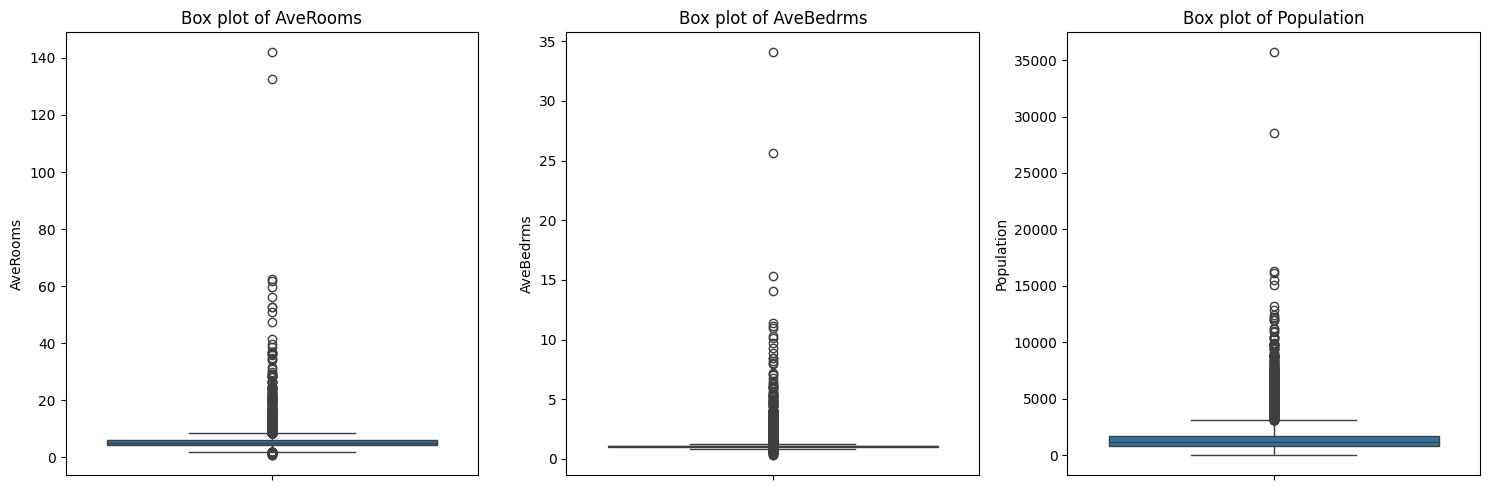

In [ ]:
import numpy as np

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Columns to check for outliers based on previous df.describe() output
columns_to_check = ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']

print("\n--- Outlier Detection Report (using IQR) ---")
for col in columns_to_check:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    print(f"\nColumn: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    if not outliers.empty:
        print("Outlier examples (first 5):\n", outliers[[col, 'PRICE']].head())

# Visualizing distributions with potential outliers for a few key columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_check[:3]): # Just showing first 3 for brevity
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Based on the outlier detection report and box plots, it's clear there are significant outliers in several features. We can choose to remove these outliers, or transform the data. For now, let's create a new DataFrame where we remove these identified outliers to see the impact on our models. We will re-split the data after outlier removal.

In [ ]:
df_cleaned = df.copy()

for col in columns_to_check:
    _, lower_bound, upper_bound = detect_outliers_iqr(df_cleaned, col)
    # Keep only the rows that are NOT outliers
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape (after outlier removal): {df_cleaned.shape}")

# Re-prepare data for training with the cleaned DataFrame
X_cleaned = df_cleaned.drop('PRICE', axis=1) # Features
y_cleaned = df_cleaned['PRICE']             # Target

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

scaler_cleaned = StandardScaler()
X_train_scaled_cleaned = scaler_cleaned.fit_transform(X_train_cleaned)
X_test_scaled_cleaned = scaler_cleaned.transform(X_test_cleaned)

print("\nShape of X_train_cleaned:", X_train_cleaned.shape)
print("Shape of X_test_cleaned:", X_test_cleaned.shape)

# Re-train and evaluate the Linear Regression model on cleaned data
lr_cleaned = LinearRegression()
lr_cleaned.fit(X_train_scaled_cleaned, y_train_cleaned)

print("\n--- Linear Regression Performance on Cleaned Data ---")
print("Train R² (cleaned data):", lr_cleaned.score(X_train_scaled_cleaned, y_train_cleaned))
print("Test R² (cleaned data):", lr_cleaned.score(X_test_scaled_cleaned, y_test_cleaned))

y_pred_cleaned = lr_cleaned.predict(X_test_scaled_cleaned)
mae_cleaned = mean_absolute_error(y_test_cleaned, y_pred_cleaned)
print("MAE (cleaned data):", mae_cleaned)


Original DataFrame shape: (20640, 9)
Cleaned DataFrame shape (after outlier removal): (17309, 9)

Shape of X_train_cleaned: (13847, 8)
Shape of X_test_cleaned: (3462, 8)

--- Linear Regression Performance on Cleaned Data ---
Train R² (cleaned data): 0.6787313651873155
Test R² (cleaned data): 0.6898330164346507
MAE (cleaned data): 0.4641983433979477


In [ ]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
print(lr.intercept_)

2.0719469373788777


In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)

print("MAE:", mae)


MAE: 0.5332001304956565


In [ ]:
import numpy as np

np.max(np.abs(lr.coef_))


np.float64(0.896928876638665)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0), #Keeps all features but shrinks coefficients to avoid extreme values.
    "Lasso": Lasso(alpha=0.01), #Can set some coefficients to exactly 0 → automatic feature selection.
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "RandomForest": RandomForestRegressor(
        n_estimators=200, random_state=42
    ),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Definition of models dictionary, moved here to resolve NameError
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0), #Keeps all features but shrinks coefficients to avoid extreme values.
    "Lasso": Lasso(alpha=0.01), #Can set some coefficients to exactly 0 → automatic feature selection.
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "RandomForest": RandomForestRegressor(
        n_estimators=200, random_state=42
    ),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

results_cleaned = [] # Use a new list to store results for cleaned data

for name, model in models.items():

    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    pipe.fit(X_train_cleaned, y_train_cleaned) # Use cleaned training data
    y_pred = pipe.predict(X_test_cleaned)       # Predict on cleaned test data

    mse = mean_squared_error(y_test_cleaned, y_pred) # Use cleaned test data for metrics

    results_cleaned.append({
        "Model": name,
        "R2": r2_score(y_test_cleaned, y_pred), # Use cleaned test data for metrics
        "MAE": mean_absolute_error(y_test_cleaned, y_pred), # Use cleaned test data for metrics
        "RMSE": np.sqrt(mse)
    })

results_df_cleaned = pd.DataFrame(results_cleaned)
print("\n--- Model Performance on Cleaned Data ---")
print(results_df_cleaned)



--- Model Performance on Cleaned Data ---
              Model        R2       MAE      RMSE
0            Linear  0.689833  0.464198  0.634609
1             Ridge  0.689842  0.464187  0.634599
2             Lasso  0.688228  0.464541  0.636249
3        ElasticNet  0.609450  0.535852  0.712109
4      RandomForest  0.821429  0.309600  0.481520
5  GradientBoosting  0.794062  0.353592  0.517103


# **BEFORE Outlier removel**

| Model            | R² (test) | MAE   | RMSE  | Interpretation                                       |
| ---------------- | --------- | ----- | ----- | ---------------------------------------------------- |
| Linear           | 0.576     | 0.533 | 0.746 | Baseline linear model                                |
| Ridge            | 0.576     | 0.533 | 0.746 | Practically identical to Linear                      |
| Lasso            | 0.582     | 0.535 | 0.740 | Slight improvement; some features zeroed             |
| ElasticNet       | 0.515     | 0.597 | 0.797 | Worse performance; probably l1_ratio/alpha not tuned |
| RandomForest     | 0.806     | 0.327 | 0.504 | **Best model by far**                                |
| GradientBoosting | 0.776     | 0.372 | 0.542 | Very good; slightly worse than RF                    |


In [ ]:

# Model B: Random Forest (Complex, accurate)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# 4. Make Predictions

y_pred_rf = rf_model.predict(X_test)

In [ ]:
# 5. Evaluate Performance
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {name} Performance ---")
    print(f"MAE: ${mae*100000:,.2f} (Average error in dollars)")
    print(f"R² Score: {r2:.4f} (Accuracy 0-1)")
    print("")

--- Random Forest Performance ---
MAE: $32,754.26 (Average error in dollars)
R² Score: 0.8051 (Accuracy 0-1)



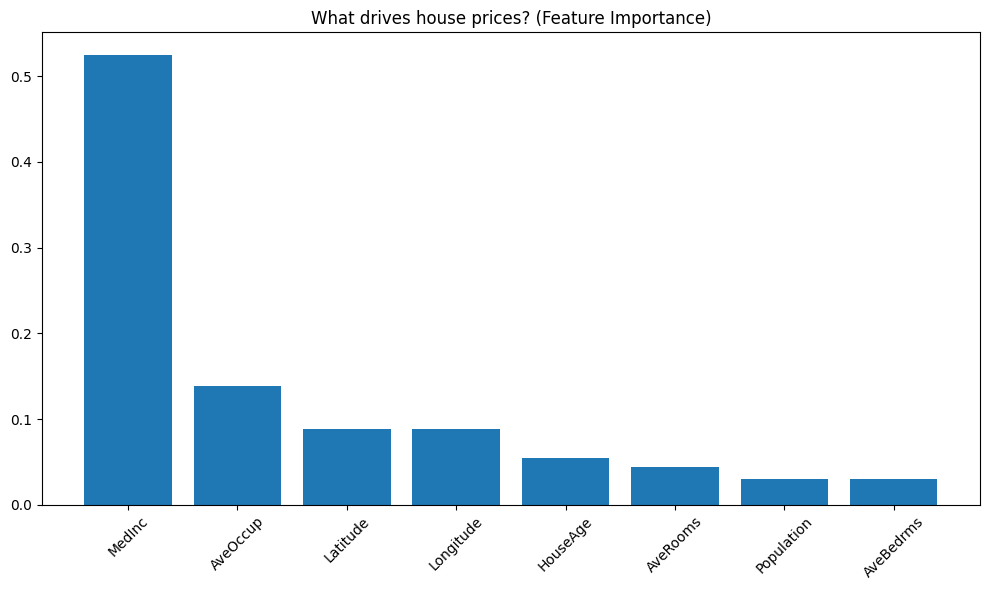

In [ ]:


evaluate_model("Random Forest", y_test, y_pred_rf)

# 6. Interpret Results (Feature Importance)
# Which features mattered most to the Random Forest?
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("What drives house prices? (Feature Importance)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.tight_layout()
plt.show()

# **hyperparameter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    "n_estimators": [100, 200, 300], # Increased options for n_estimators
    "max_depth": [None, 10, 20], # Adjusted max_depth options
    "min_samples_split": [2, 5, 10]
}

# Use X_train_scaled_cleaned and y_train_cleaned for GridSearchCV
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring="r2", verbose=2, n_jobs=-1) # verbose for progress, n_jobs for parallel processing
grid.fit(X_train_scaled_cleaned, y_train_cleaned)

best_rf_cleaned = grid.best_estimator_
print("Best Hyperparameters for Random Forest:", grid.best_params_)
print("Test R² of Tuned Random Forest on Cleaned Data:", best_rf_cleaned.score(X_test_scaled_cleaned, y_test_cleaned))

y_pred_best_rf = best_rf_cleaned.predict(X_test_scaled_cleaned)
mae_best_rf = mean_absolute_error(y_test_cleaned, y_pred_best_rf)
r2_best_rf = r2_score(y_test_cleaned, y_pred_best_rf)

print("MAE of Tuned Random Forest on Cleaned Data:", mae_best_rf)
print("R² Score of Tuned Random Forest on Cleaned Data:", r2_best_rf)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Test R² of Tuned Random Forest on Cleaned Data: 0.8221324388747561
MAE of Tuned Random Forest on Cleaned Data: 0.3091477830252266
R² Score of Tuned Random Forest on Cleaned Data: 0.8221324388747561


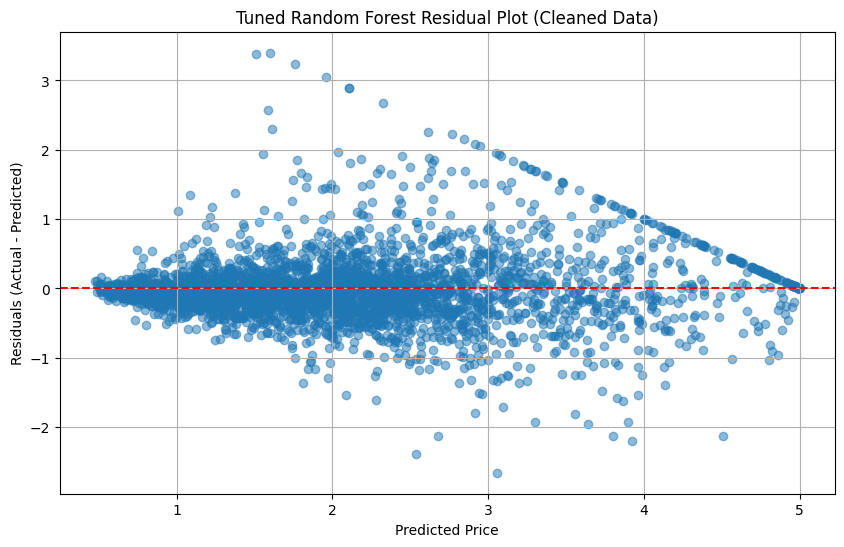

In [ ]:
import matplotlib.pyplot as plt

y_pred_tuned_rf = best_rf_cleaned.predict(X_test_scaled_cleaned)
residuals_tuned_rf = y_test_cleaned - y_pred_tuned_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_tuned_rf, residuals_tuned_rf, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Tuned Random Forest Residual Plot (Cleaned Data)")
plt.grid(True)
plt.show()